## This notebook are the running results for variant Strided_CNN_C net

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import sampler

import help_func
import new_ALL_Conv

right


In [2]:
train_batch_size = 4
test_batch_size = 4

NUM_TRAIN = 49000

transform = transforms.Compose(
          [transforms.ToTensor(),
           transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

cifar10_train = torchvision.datasets.CIFAR10('./cs231n/datasets', train=True, download=True,
                             transform=transform)
loader_train = torch.utils.data.DataLoader(cifar10_train, batch_size=train_batch_size, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = torchvision.datasets.CIFAR10('./cs231n/datasets', train=True, download=True,
                           transform=transform)
loader_val = torch.utils.data.DataLoader(cifar10_val, batch_size=train_batch_size, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))

cifar10_test = torchvision.datasets.CIFAR10('./cs231n/datasets', train=False, download=True, 
                            transform=transform)
loader_test = torch.utils.data.DataLoader(cifar10_test, batch_size=test_batch_size)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
class Stride_CNN_C(nn.Module):
    def __init__(self, num_classes=10):
        super (Stride_CNN_C, self).__init__()
        self.num_classes = num_classes
        
        self.conv1 = nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv1.weight)
        nn.init.constant_(self.conv1.bias, 0)
        
        self.dropout1 = nn.Dropout2d(0.2)
        
        self.conv2 = nn.Conv2d(96, 96, kernel_size=3, stride=2, padding=0)
        nn.init.kaiming_normal_(self.conv2.weight)
        nn.init.constant_(self.conv2.bias, 0)
        
        
        self.dropout2 = nn.Dropout(0.5)
        
        self.conv3 = nn.Conv2d(96, 192, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv3.weight)
        nn.init.constant_(self.conv3.bias, 0)
        
        self.conv4 = nn.Conv2d(192, 192, kernel_size=3, stride=2, padding=0)
        nn.init.kaiming_normal_(self.conv4.weight)
        nn.init.constant_(self.conv4.bias, 0)
        
       
        self.dropout3 = nn.Dropout(0.5)
        
        self.conv5 = nn.Conv2d(192, 192, kernel_size=3, padding=3)
        nn.init.kaiming_normal_(self.conv5.weight)
        nn.init.constant_(self.conv5.bias, 0)
        
        self.conv6 = nn.Conv2d(192, 192, kernel_size=1)
        nn.init.kaiming_normal_(self.conv6.weight)
        nn.init.constant_(self.conv6.bias, 0)
        
        self.conv7 = nn.Conv2d(192, self.num_classes, kernel_size=1)
        nn.init.kaiming_normal_(self.conv7.weight)
        nn.init.constant_(self.conv7.bias, 0)
        
        self.glb_avg = nn.AvgPool2d(6)
        
    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.dropout1(out)
        
        out = self.conv2(out)
        out = F.relu(out)
        
        
        out = self.dropout2(out)
        
        out = self.conv3(out)
        out = F.relu(out)
        
        out = self.conv4(out)
        out = F.relu(out)
        
        out = self.dropout3(out)
        
        out = self.conv5(out)
        out = F.relu(out)
        
        out = self.conv6(out)
        out = F.relu(out)
        
        out = self.conv7(out)
        out = F.relu(out)
        
        out = self.glb_avg(out)
        out = out.view(-1, self.num_classes)
        return out
orig_stride_cnn_c = Stride_CNN_C(num_classes=10)


using device: cuda
begin training
Checking accuracy on validation set
Got 181 / 1000 correct (18.10)
1 epoch,  1000 iteration, loss:2.276
Checking accuracy on validation set
Got 185 / 1000 correct (18.50)
1 epoch,  2000 iteration, loss:2.150
Checking accuracy on validation set
Got 251 / 1000 correct (25.10)
1 epoch,  3000 iteration, loss:2.039
Checking accuracy on validation set
Got 299 / 1000 correct (29.90)
1 epoch,  4000 iteration, loss:1.946
Checking accuracy on validation set
Got 260 / 1000 correct (26.00)
1 epoch,  5000 iteration, loss:1.907
Checking accuracy on validation set
Got 357 / 1000 correct (35.70)
1 epoch,  6000 iteration, loss:1.840
Checking accuracy on validation set
Got 342 / 1000 correct (34.20)
1 epoch,  7000 iteration, loss:1.807
Checking accuracy on validation set
Got 339 / 1000 correct (33.90)
1 epoch,  8000 iteration, loss:1.767
Checking accuracy on validation set
Got 393 / 1000 correct (39.30)
1 epoch,  9000 iteration, loss:1.715
Checking accuracy on validatio

Got 658 / 1000 correct (65.80)
7 epoch,  4000 iteration, loss:1.048
Checking accuracy on validation set
Got 660 / 1000 correct (66.00)
7 epoch,  5000 iteration, loss:1.068
Checking accuracy on validation set
Got 682 / 1000 correct (68.20)
7 epoch,  6000 iteration, loss:1.053
Checking accuracy on validation set
Got 676 / 1000 correct (67.60)
7 epoch,  7000 iteration, loss:1.038
Checking accuracy on validation set
Got 657 / 1000 correct (65.70)
7 epoch,  8000 iteration, loss:1.017
Checking accuracy on validation set
Got 665 / 1000 correct (66.50)
7 epoch,  9000 iteration, loss:1.009
Checking accuracy on validation set
Got 654 / 1000 correct (65.40)
7 epoch, 10000 iteration, loss:1.030
Checking accuracy on validation set
Got 664 / 1000 correct (66.40)
7 epoch, 11000 iteration, loss:1.008
Checking accuracy on validation set
Got 676 / 1000 correct (67.60)
7 epoch, 12000 iteration, loss:1.019
 num 6 epoch 
####### Training Loss #######
[1.01025924]
Checking accuracy on validation set
Got 680

Checking accuracy on validation set
Got 733 / 1000 correct (73.30)
13 epoch,  8000 iteration, loss:0.842
Checking accuracy on validation set
Got 741 / 1000 correct (74.10)
13 epoch,  9000 iteration, loss:0.822
Checking accuracy on validation set
Got 750 / 1000 correct (75.00)
13 epoch, 10000 iteration, loss:0.835
Checking accuracy on validation set
Got 753 / 1000 correct (75.30)
13 epoch, 11000 iteration, loss:0.827
Checking accuracy on validation set
Got 731 / 1000 correct (73.10)
13 epoch, 12000 iteration, loss:0.864
 num 12 epoch 
####### Training Loss #######
[0.82365397]
Checking accuracy on validation set
Got 755 / 1000 correct (75.50)
14 epoch,  1000 iteration, loss:0.803
Checking accuracy on validation set
Got 743 / 1000 correct (74.30)
14 epoch,  2000 iteration, loss:0.806
Checking accuracy on validation set
Got 745 / 1000 correct (74.50)
14 epoch,  3000 iteration, loss:0.836
Checking accuracy on validation set
Got 695 / 1000 correct (69.50)
14 epoch,  4000 iteration, loss:0.8

Checking accuracy on validation set
Got 764 / 1000 correct (76.40)
19 epoch, 11000 iteration, loss:0.753
Checking accuracy on validation set
Got 763 / 1000 correct (76.30)
19 epoch, 12000 iteration, loss:0.784
 num 18 epoch 
####### Training Loss #######
[0.73229279]
Checking accuracy on validation set
Got 748 / 1000 correct (74.80)
20 epoch,  1000 iteration, loss:0.736
Checking accuracy on validation set
Got 783 / 1000 correct (78.30)
20 epoch,  2000 iteration, loss:0.727
Checking accuracy on validation set
Got 757 / 1000 correct (75.70)
20 epoch,  3000 iteration, loss:0.735
Checking accuracy on validation set
Got 785 / 1000 correct (78.50)
20 epoch,  4000 iteration, loss:0.746
Checking accuracy on validation set
Got 771 / 1000 correct (77.10)
20 epoch,  5000 iteration, loss:0.749
Checking accuracy on validation set
Got 766 / 1000 correct (76.60)
20 epoch,  6000 iteration, loss:0.738
Checking accuracy on validation set
Got 747 / 1000 correct (74.70)
20 epoch,  7000 iteration, loss:0.7

Got 771 / 1000 correct (77.10)
26 epoch,  1000 iteration, loss:0.671
Checking accuracy on validation set
Got 786 / 1000 correct (78.60)
26 epoch,  2000 iteration, loss:0.691
Checking accuracy on validation set
Got 758 / 1000 correct (75.80)
26 epoch,  3000 iteration, loss:0.654
Checking accuracy on validation set
Got 790 / 1000 correct (79.00)
26 epoch,  4000 iteration, loss:0.678
Checking accuracy on validation set
Got 790 / 1000 correct (79.00)
26 epoch,  5000 iteration, loss:0.653
Checking accuracy on validation set
Got 783 / 1000 correct (78.30)
26 epoch,  6000 iteration, loss:0.700
Checking accuracy on validation set
Got 775 / 1000 correct (77.50)
26 epoch,  7000 iteration, loss:0.693
Checking accuracy on validation set
Got 781 / 1000 correct (78.10)
26 epoch,  8000 iteration, loss:0.698
Checking accuracy on validation set
Got 773 / 1000 correct (77.30)
26 epoch,  9000 iteration, loss:0.700
Checking accuracy on validation set
Got 780 / 1000 correct (78.00)
26 epoch, 10000 iteratio

Got 780 / 1000 correct (78.00)
32 epoch,  4000 iteration, loss:0.645
Checking accuracy on validation set
Got 798 / 1000 correct (79.80)
32 epoch,  5000 iteration, loss:0.680
Checking accuracy on validation set
Got 775 / 1000 correct (77.50)
32 epoch,  6000 iteration, loss:0.654
Checking accuracy on validation set
Got 761 / 1000 correct (76.10)
32 epoch,  7000 iteration, loss:0.660
Checking accuracy on validation set
Got 763 / 1000 correct (76.30)
32 epoch,  8000 iteration, loss:0.662
Checking accuracy on validation set
Got 782 / 1000 correct (78.20)
32 epoch,  9000 iteration, loss:0.664
Checking accuracy on validation set
Got 794 / 1000 correct (79.40)
32 epoch, 10000 iteration, loss:0.688
Checking accuracy on validation set
Got 758 / 1000 correct (75.80)
32 epoch, 11000 iteration, loss:0.658
Checking accuracy on validation set
Got 794 / 1000 correct (79.40)
32 epoch, 12000 iteration, loss:0.649
 num 31 epoch 
####### Training Loss #######
[0.63892148]
Checking accuracy on validation s

Got 791 / 1000 correct (79.10)
38 epoch,  7000 iteration, loss:0.629
Checking accuracy on validation set
Got 784 / 1000 correct (78.40)
38 epoch,  8000 iteration, loss:0.621
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
38 epoch,  9000 iteration, loss:0.633
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
38 epoch, 10000 iteration, loss:0.645
Checking accuracy on validation set
Got 788 / 1000 correct (78.80)
38 epoch, 11000 iteration, loss:0.638
Checking accuracy on validation set
Got 781 / 1000 correct (78.10)
38 epoch, 12000 iteration, loss:0.656
 num 37 epoch 
####### Training Loss #######
[0.61872657]
Checking accuracy on validation set
Got 796 / 1000 correct (79.60)
39 epoch,  1000 iteration, loss:0.608
Checking accuracy on validation set
Got 790 / 1000 correct (79.00)
39 epoch,  2000 iteration, loss:0.623
Checking accuracy on validation set
Got 785 / 1000 correct (78.50)
39 epoch,  3000 iteration, loss:0.602
Checking accuracy on validation s

Got 798 / 1000 correct (79.80)
44 epoch, 10000 iteration, loss:0.612
Checking accuracy on validation set
Got 779 / 1000 correct (77.90)
44 epoch, 11000 iteration, loss:0.574
Checking accuracy on validation set
Got 789 / 1000 correct (78.90)
44 epoch, 12000 iteration, loss:0.617
 num 43 epoch 
####### Training Loss #######
[0.59775358]
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
45 epoch,  1000 iteration, loss:0.588
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
45 epoch,  2000 iteration, loss:0.595
Checking accuracy on validation set
Got 810 / 1000 correct (81.00)
45 epoch,  3000 iteration, loss:0.607
Checking accuracy on validation set
Got 793 / 1000 correct (79.30)
45 epoch,  4000 iteration, loss:0.592
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
45 epoch,  5000 iteration, loss:0.597
Checking accuracy on validation set
Got 798 / 1000 correct (79.80)
45 epoch,  6000 iteration, loss:0.624
Checking accuracy on validation s

Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
51 epoch,  1000 iteration, loss:0.556
Checking accuracy on validation set
Got 776 / 1000 correct (77.60)
51 epoch,  2000 iteration, loss:0.542
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
51 epoch,  3000 iteration, loss:0.591
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
51 epoch,  4000 iteration, loss:0.617
Checking accuracy on validation set
Got 793 / 1000 correct (79.30)
51 epoch,  5000 iteration, loss:0.606
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
51 epoch,  6000 iteration, loss:0.582
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
51 epoch,  7000 iteration, loss:0.607
Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
51 epoch,  8000 iteration, loss:0.595
Checking accuracy on validation set
Got 774 / 1000 correct (77.40)
51 epoch,  9000 iteration, loss:0.594
Checking accuracy on validation set
Got 815 / 1000 corr

Checking accuracy on validation set
Got 796 / 1000 correct (79.60)
57 epoch,  4000 iteration, loss:0.579
Checking accuracy on validation set
Got 793 / 1000 correct (79.30)
57 epoch,  5000 iteration, loss:0.586
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
57 epoch,  6000 iteration, loss:0.574
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
57 epoch,  7000 iteration, loss:0.578
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
57 epoch,  8000 iteration, loss:0.597
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
57 epoch,  9000 iteration, loss:0.591
Checking accuracy on validation set
Got 781 / 1000 correct (78.10)
57 epoch, 10000 iteration, loss:0.605
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
57 epoch, 11000 iteration, loss:0.613
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
57 epoch, 12000 iteration, loss:0.597
 num 56 epoch 
####### Training Loss #######
[0.5733053

Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
63 epoch,  7000 iteration, loss:0.563
Checking accuracy on validation set
Got 798 / 1000 correct (79.80)
63 epoch,  8000 iteration, loss:0.596
Checking accuracy on validation set
Got 798 / 1000 correct (79.80)
63 epoch,  9000 iteration, loss:0.586
Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
63 epoch, 10000 iteration, loss:0.572
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
63 epoch, 11000 iteration, loss:0.587
Checking accuracy on validation set
Got 794 / 1000 correct (79.40)
63 epoch, 12000 iteration, loss:0.601
 num 62 epoch 
####### Training Loss #######
[0.56389973]
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
64 epoch,  1000 iteration, loss:0.526
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
64 epoch,  2000 iteration, loss:0.553
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
64 epoch,  3000 iteration, loss:0.5

Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
69 epoch, 10000 iteration, loss:0.606
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
69 epoch, 11000 iteration, loss:0.595
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
69 epoch, 12000 iteration, loss:0.587
 num 68 epoch 
####### Training Loss #######
[0.55838863]
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
70 epoch,  1000 iteration, loss:0.537
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
70 epoch,  2000 iteration, loss:0.544
Checking accuracy on validation set
Got 796 / 1000 correct (79.60)
70 epoch,  3000 iteration, loss:0.506
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
70 epoch,  4000 iteration, loss:0.551
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
70 epoch,  5000 iteration, loss:0.559
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
70 epoch,  6000 iteration, loss:0.5

 num 74 epoch 
####### Training Loss #######
[0.55137552]
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
76 epoch,  1000 iteration, loss:0.522
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
76 epoch,  2000 iteration, loss:0.534
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
76 epoch,  3000 iteration, loss:0.559
Checking accuracy on validation set
Got 801 / 1000 correct (80.10)
76 epoch,  4000 iteration, loss:0.551
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
76 epoch,  5000 iteration, loss:0.560
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
76 epoch,  6000 iteration, loss:0.587
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
76 epoch,  7000 iteration, loss:0.555
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
76 epoch,  8000 iteration, loss:0.585
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
76 epoch,  9000 iteration, loss:0.5

Got 818 / 1000 correct (81.80)
82 epoch,  3000 iteration, loss:0.557
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
82 epoch,  4000 iteration, loss:0.554
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
82 epoch,  5000 iteration, loss:0.526
Checking accuracy on validation set
Got 794 / 1000 correct (79.40)
82 epoch,  6000 iteration, loss:0.563
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
82 epoch,  7000 iteration, loss:0.578
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
82 epoch,  8000 iteration, loss:0.571
Checking accuracy on validation set
Got 780 / 1000 correct (78.00)
82 epoch,  9000 iteration, loss:0.561
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
82 epoch, 10000 iteration, loss:0.590
Checking accuracy on validation set
Got 798 / 1000 correct (79.80)
82 epoch, 11000 iteration, loss:0.555
Checking accuracy on validation set
Got 778 / 1000 correct (77.80)
82 epoch, 12000 iteratio

Got 823 / 1000 correct (82.30)
88 epoch,  6000 iteration, loss:0.558
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
88 epoch,  7000 iteration, loss:0.550
Checking accuracy on validation set
Got 794 / 1000 correct (79.40)
88 epoch,  8000 iteration, loss:0.559
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
88 epoch,  9000 iteration, loss:0.557
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
88 epoch, 10000 iteration, loss:0.571
Checking accuracy on validation set
Got 792 / 1000 correct (79.20)
88 epoch, 11000 iteration, loss:0.553
Checking accuracy on validation set
Got 810 / 1000 correct (81.00)
88 epoch, 12000 iteration, loss:0.581
 num 87 epoch 
####### Training Loss #######
[0.54131138]
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
89 epoch,  1000 iteration, loss:0.543
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
89 epoch,  2000 iteration, loss:0.530
Checking accuracy on validation s

Got 800 / 1000 correct (80.00)
94 epoch,  9000 iteration, loss:0.580
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
94 epoch, 10000 iteration, loss:0.561
Checking accuracy on validation set
Got 782 / 1000 correct (78.20)
94 epoch, 11000 iteration, loss:0.558
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
94 epoch, 12000 iteration, loss:0.537
 num 93 epoch 
####### Training Loss #######
[0.53607076]
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
95 epoch,  1000 iteration, loss:0.518
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
95 epoch,  2000 iteration, loss:0.517
Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
95 epoch,  3000 iteration, loss:0.527
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
95 epoch,  4000 iteration, loss:0.534
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
95 epoch,  5000 iteration, loss:0.549
Checking accuracy on validation s

Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
100 epoch, 12000 iteration, loss:0.585
 num 99 epoch 
####### Training Loss #######
[0.53845139]
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
101 epoch,  1000 iteration, loss:0.559
Checking accuracy on validation set
Got 792 / 1000 correct (79.20)
101 epoch,  2000 iteration, loss:0.511
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
101 epoch,  3000 iteration, loss:0.520
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
101 epoch,  4000 iteration, loss:0.533
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
101 epoch,  5000 iteration, loss:0.550
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
101 epoch,  6000 iteration, loss:0.540
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
101 epoch,  7000 iteration, loss:0.550
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
101 epoch,  8000 iteration,

Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
107 epoch,  2000 iteration, loss:0.486
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
107 epoch,  3000 iteration, loss:0.558
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
107 epoch,  4000 iteration, loss:0.526
Checking accuracy on validation set
Got 810 / 1000 correct (81.00)
107 epoch,  5000 iteration, loss:0.565
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
107 epoch,  6000 iteration, loss:0.531
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
107 epoch,  7000 iteration, loss:0.551
Checking accuracy on validation set
Got 796 / 1000 correct (79.60)
107 epoch,  8000 iteration, loss:0.554
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
107 epoch,  9000 iteration, loss:0.523
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
107 epoch, 10000 iteration, loss:0.581
Checking accuracy on validation set
Got 809 / 

Checking accuracy on validation set
Got 796 / 1000 correct (79.60)
113 epoch,  4000 iteration, loss:0.559
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
113 epoch,  5000 iteration, loss:0.549
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
113 epoch,  6000 iteration, loss:0.549
Checking accuracy on validation set
Got 797 / 1000 correct (79.70)
113 epoch,  7000 iteration, loss:0.552
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
113 epoch,  8000 iteration, loss:0.577
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
113 epoch,  9000 iteration, loss:0.577
Checking accuracy on validation set
Got 797 / 1000 correct (79.70)
113 epoch, 10000 iteration, loss:0.545
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
113 epoch, 11000 iteration, loss:0.575
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
113 epoch, 12000 iteration, loss:0.554
 num 112 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
119 epoch,  6000 iteration, loss:0.541
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
119 epoch,  7000 iteration, loss:0.543
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
119 epoch,  8000 iteration, loss:0.562
Checking accuracy on validation set
Got 800 / 1000 correct (80.00)
119 epoch,  9000 iteration, loss:0.542
Checking accuracy on validation set
Got 801 / 1000 correct (80.10)
119 epoch, 10000 iteration, loss:0.549
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
119 epoch, 11000 iteration, loss:0.545
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
119 epoch, 12000 iteration, loss:0.565
 num 118 epoch 
####### Training Loss #######
[0.52506215]
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
120 epoch,  1000 iteration, loss:0.492
Checking accuracy on validation set
Got 810 / 1000 correct (81.00)
120 epoch,  2000 iteration

Checking accuracy on validation set
Got 801 / 1000 correct (80.10)
125 epoch,  8000 iteration, loss:0.544
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
125 epoch,  9000 iteration, loss:0.577
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
125 epoch, 10000 iteration, loss:0.562
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
125 epoch, 11000 iteration, loss:0.540
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
125 epoch, 12000 iteration, loss:0.546
 num 124 epoch 
####### Training Loss #######
[0.52761428]
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
126 epoch,  1000 iteration, loss:0.511
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
126 epoch,  2000 iteration, loss:0.526
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
126 epoch,  3000 iteration, loss:0.518
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
126 epoch,  4000 iteration

Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
131 epoch, 10000 iteration, loss:0.530
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
131 epoch, 11000 iteration, loss:0.561
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
131 epoch, 12000 iteration, loss:0.541
 num 130 epoch 
####### Training Loss #######
[0.52664181]
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
132 epoch,  1000 iteration, loss:0.517
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
132 epoch,  2000 iteration, loss:0.489
Checking accuracy on validation set
Got 801 / 1000 correct (80.10)
132 epoch,  3000 iteration, loss:0.529
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
132 epoch,  4000 iteration, loss:0.535
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
132 epoch,  5000 iteration, loss:0.526
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
132 epoch,  6000 iteration

Checking accuracy on validation set
Got 810 / 1000 correct (81.00)
137 epoch, 12000 iteration, loss:0.546
 num 136 epoch 
####### Training Loss #######
[0.52137391]
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
138 epoch,  1000 iteration, loss:0.508
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
138 epoch,  2000 iteration, loss:0.496
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
138 epoch,  3000 iteration, loss:0.530
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
138 epoch,  4000 iteration, loss:0.517
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
138 epoch,  5000 iteration, loss:0.560
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
138 epoch,  6000 iteration, loss:0.513
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
138 epoch,  7000 iteration, loss:0.519
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
138 epoch,  8000 iteration

Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
144 epoch,  2000 iteration, loss:0.530
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
144 epoch,  3000 iteration, loss:0.508
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
144 epoch,  4000 iteration, loss:0.545
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
144 epoch,  5000 iteration, loss:0.551
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
144 epoch,  6000 iteration, loss:0.510
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
144 epoch,  7000 iteration, loss:0.540
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
144 epoch,  8000 iteration, loss:0.540
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
144 epoch,  9000 iteration, loss:0.521
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
144 epoch, 10000 iteration, loss:0.556
Checking accuracy on validation set
Got 813 / 

Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
150 epoch,  4000 iteration, loss:0.513
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
150 epoch,  5000 iteration, loss:0.542
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
150 epoch,  6000 iteration, loss:0.526
Checking accuracy on validation set
Got 786 / 1000 correct (78.60)
150 epoch,  7000 iteration, loss:0.533
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
150 epoch,  8000 iteration, loss:0.537
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
150 epoch,  9000 iteration, loss:0.524
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
150 epoch, 10000 iteration, loss:0.542
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
150 epoch, 11000 iteration, loss:0.545
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
150 epoch, 12000 iteration, loss:0.543
 num 149 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
156 epoch,  6000 iteration, loss:0.522
Checking accuracy on validation set
Got 797 / 1000 correct (79.70)
156 epoch,  7000 iteration, loss:0.543
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
156 epoch,  8000 iteration, loss:0.543
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
156 epoch,  9000 iteration, loss:0.560
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
156 epoch, 10000 iteration, loss:0.568
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
156 epoch, 11000 iteration, loss:0.552
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
156 epoch, 12000 iteration, loss:0.527
 num 155 epoch 
####### Training Loss #######
[0.52156864]
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
157 epoch,  1000 iteration, loss:0.483
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
157 epoch,  2000 iteration

Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
162 epoch,  8000 iteration, loss:0.544
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
162 epoch,  9000 iteration, loss:0.519
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
162 epoch, 10000 iteration, loss:0.556
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
162 epoch, 11000 iteration, loss:0.538
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
162 epoch, 12000 iteration, loss:0.543
 num 161 epoch 
####### Training Loss #######
[0.52259075]
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
163 epoch,  1000 iteration, loss:0.502
Checking accuracy on validation set
Got 810 / 1000 correct (81.00)
163 epoch,  2000 iteration, loss:0.504
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
163 epoch,  3000 iteration, loss:0.522
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
163 epoch,  4000 iteration

Checking accuracy on validation set
Got 797 / 1000 correct (79.70)
168 epoch, 10000 iteration, loss:0.535
Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
168 epoch, 11000 iteration, loss:0.565
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
168 epoch, 12000 iteration, loss:0.552
 num 167 epoch 
####### Training Loss #######
[0.51836833]
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
169 epoch,  1000 iteration, loss:0.487
Checking accuracy on validation set
Got 786 / 1000 correct (78.60)
169 epoch,  2000 iteration, loss:0.503
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
169 epoch,  3000 iteration, loss:0.502
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
169 epoch,  4000 iteration, loss:0.533
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
169 epoch,  5000 iteration, loss:0.528
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
169 epoch,  6000 iteration

Checking accuracy on validation set
Got 787 / 1000 correct (78.70)
174 epoch, 12000 iteration, loss:0.537
 num 173 epoch 
####### Training Loss #######
[0.51530382]
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
175 epoch,  1000 iteration, loss:0.489
Checking accuracy on validation set
Got 798 / 1000 correct (79.80)
175 epoch,  2000 iteration, loss:0.517
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
175 epoch,  3000 iteration, loss:0.494
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
175 epoch,  4000 iteration, loss:0.515
Checking accuracy on validation set
Got 800 / 1000 correct (80.00)
175 epoch,  5000 iteration, loss:0.504
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
175 epoch,  6000 iteration, loss:0.549
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
175 epoch,  7000 iteration, loss:0.510
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
175 epoch,  8000 iteration

Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
181 epoch,  2000 iteration, loss:0.514
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
181 epoch,  3000 iteration, loss:0.509
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
181 epoch,  4000 iteration, loss:0.519
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
181 epoch,  5000 iteration, loss:0.526
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
181 epoch,  6000 iteration, loss:0.514
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
181 epoch,  7000 iteration, loss:0.532
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
181 epoch,  8000 iteration, loss:0.562
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
181 epoch,  9000 iteration, loss:0.539
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
181 epoch, 10000 iteration, loss:0.549
Checking accuracy on validation set
Got 799 / 

Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
187 epoch,  4000 iteration, loss:0.510
Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
187 epoch,  5000 iteration, loss:0.507
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
187 epoch,  6000 iteration, loss:0.507
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
187 epoch,  7000 iteration, loss:0.499
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
187 epoch,  8000 iteration, loss:0.517
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
187 epoch,  9000 iteration, loss:0.558
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
187 epoch, 10000 iteration, loss:0.532
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
187 epoch, 11000 iteration, loss:0.534
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
187 epoch, 12000 iteration, loss:0.547
 num 186 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
193 epoch,  6000 iteration, loss:0.546
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
193 epoch,  7000 iteration, loss:0.522
Checking accuracy on validation set
Got 797 / 1000 correct (79.70)
193 epoch,  8000 iteration, loss:0.518
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
193 epoch,  9000 iteration, loss:0.551
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
193 epoch, 10000 iteration, loss:0.537
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
193 epoch, 11000 iteration, loss:0.539
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
193 epoch, 12000 iteration, loss:0.543
 num 192 epoch 
####### Training Loss #######
[0.51433794]
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
194 epoch,  1000 iteration, loss:0.491
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
194 epoch,  2000 iteration

Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
199 epoch,  8000 iteration, loss:0.538
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
199 epoch,  9000 iteration, loss:0.544
Checking accuracy on validation set
Got 782 / 1000 correct (78.20)
199 epoch, 10000 iteration, loss:0.554
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
199 epoch, 11000 iteration, loss:0.548
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
199 epoch, 12000 iteration, loss:0.542
 num 198 epoch 
####### Training Loss #######
[0.5165079]
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
200 epoch,  1000 iteration, loss:0.471
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
200 epoch,  2000 iteration, loss:0.526
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
200 epoch,  3000 iteration, loss:0.494
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
200 epoch,  4000 iteration,

Checking accuracy on validation set
Got 791 / 1000 correct (79.10)
205 epoch, 10000 iteration, loss:0.539
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
205 epoch, 11000 iteration, loss:0.547
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
205 epoch, 12000 iteration, loss:0.546
 num 204 epoch 
####### Training Loss #######
[0.51191276]
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
206 epoch,  1000 iteration, loss:0.523
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
206 epoch,  2000 iteration, loss:0.506
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
206 epoch,  3000 iteration, loss:0.507
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
206 epoch,  4000 iteration, loss:0.507
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
206 epoch,  5000 iteration, loss:0.516
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
206 epoch,  6000 iteration

Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
211 epoch, 12000 iteration, loss:0.536
 num 210 epoch 
####### Training Loss #######
[0.50866781]
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
212 epoch,  1000 iteration, loss:0.497
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
212 epoch,  2000 iteration, loss:0.495
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
212 epoch,  3000 iteration, loss:0.532
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
212 epoch,  4000 iteration, loss:0.520
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
212 epoch,  5000 iteration, loss:0.495
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
212 epoch,  6000 iteration, loss:0.502
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
212 epoch,  7000 iteration, loss:0.550
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
212 epoch,  8000 iteration

Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
218 epoch,  2000 iteration, loss:0.521
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
218 epoch,  3000 iteration, loss:0.536
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
218 epoch,  4000 iteration, loss:0.489
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
218 epoch,  5000 iteration, loss:0.507
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
218 epoch,  6000 iteration, loss:0.514
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
218 epoch,  7000 iteration, loss:0.521
Checking accuracy on validation set
Got 801 / 1000 correct (80.10)
218 epoch,  8000 iteration, loss:0.536
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
218 epoch,  9000 iteration, loss:0.523
Checking accuracy on validation set
Got 797 / 1000 correct (79.70)
218 epoch, 10000 iteration, loss:0.531
Checking accuracy on validation set
Got 810 / 

Checking accuracy on validation set
Got 788 / 1000 correct (78.80)
224 epoch,  4000 iteration, loss:0.507
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
224 epoch,  5000 iteration, loss:0.528
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
224 epoch,  6000 iteration, loss:0.531
Checking accuracy on validation set
Got 796 / 1000 correct (79.60)
224 epoch,  7000 iteration, loss:0.531
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
224 epoch,  8000 iteration, loss:0.519
Checking accuracy on validation set
Got 794 / 1000 correct (79.40)
224 epoch,  9000 iteration, loss:0.537
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
224 epoch, 10000 iteration, loss:0.544
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
224 epoch, 11000 iteration, loss:0.521
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
224 epoch, 12000 iteration, loss:0.546
 num 223 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
230 epoch,  6000 iteration, loss:0.518
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
230 epoch,  7000 iteration, loss:0.552
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
230 epoch,  8000 iteration, loss:0.532
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
230 epoch,  9000 iteration, loss:0.555
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
230 epoch, 10000 iteration, loss:0.502
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
230 epoch, 11000 iteration, loss:0.541
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
230 epoch, 12000 iteration, loss:0.495
 num 229 epoch 
####### Training Loss #######
[0.50947781]
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
231 epoch,  1000 iteration, loss:0.495
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
231 epoch,  2000 iteration

Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
236 epoch,  8000 iteration, loss:0.501
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
236 epoch,  9000 iteration, loss:0.516
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
236 epoch, 10000 iteration, loss:0.528
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
236 epoch, 11000 iteration, loss:0.555
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
236 epoch, 12000 iteration, loss:0.559
 num 235 epoch 
####### Training Loss #######
[0.50880433]
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
237 epoch,  1000 iteration, loss:0.475
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
237 epoch,  2000 iteration, loss:0.482
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
237 epoch,  3000 iteration, loss:0.494
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
237 epoch,  4000 iteration

Checking accuracy on validation set
Got 810 / 1000 correct (81.00)
242 epoch, 10000 iteration, loss:0.540
Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
242 epoch, 11000 iteration, loss:0.553
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
242 epoch, 12000 iteration, loss:0.539
 num 241 epoch 
####### Training Loss #######
[0.5084947]
Checking accuracy on validation set
Got 801 / 1000 correct (80.10)
243 epoch,  1000 iteration, loss:0.500
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
243 epoch,  2000 iteration, loss:0.528
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
243 epoch,  3000 iteration, loss:0.527
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
243 epoch,  4000 iteration, loss:0.484
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
243 epoch,  5000 iteration, loss:0.521
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
243 epoch,  6000 iteration,

Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
248 epoch, 12000 iteration, loss:0.537
 num 247 epoch 
####### Training Loss #######
[0.50886513]
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
249 epoch,  1000 iteration, loss:0.465
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
249 epoch,  2000 iteration, loss:0.519
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
249 epoch,  3000 iteration, loss:0.500
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
249 epoch,  4000 iteration, loss:0.494
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
249 epoch,  5000 iteration, loss:0.488
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
249 epoch,  6000 iteration, loss:0.523
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
249 epoch,  7000 iteration, loss:0.536
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
249 epoch,  8000 iteration

Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
255 epoch,  2000 iteration, loss:0.498
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
255 epoch,  3000 iteration, loss:0.517
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
255 epoch,  4000 iteration, loss:0.508
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
255 epoch,  5000 iteration, loss:0.515
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
255 epoch,  6000 iteration, loss:0.522
Checking accuracy on validation set
Got 793 / 1000 correct (79.30)
255 epoch,  7000 iteration, loss:0.525
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
255 epoch,  8000 iteration, loss:0.532
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
255 epoch,  9000 iteration, loss:0.517
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
255 epoch, 10000 iteration, loss:0.530
Checking accuracy on validation set
Got 817 / 

Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
261 epoch,  4000 iteration, loss:0.523
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
261 epoch,  5000 iteration, loss:0.534
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
261 epoch,  6000 iteration, loss:0.503
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
261 epoch,  7000 iteration, loss:0.524
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
261 epoch,  8000 iteration, loss:0.520
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
261 epoch,  9000 iteration, loss:0.532
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
261 epoch, 10000 iteration, loss:0.524
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
261 epoch, 11000 iteration, loss:0.550
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
261 epoch, 12000 iteration, loss:0.537
 num 260 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
267 epoch,  6000 iteration, loss:0.513
Checking accuracy on validation set
Got 777 / 1000 correct (77.70)
267 epoch,  7000 iteration, loss:0.549
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
267 epoch,  8000 iteration, loss:0.529
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
267 epoch,  9000 iteration, loss:0.518
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
267 epoch, 10000 iteration, loss:0.512
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
267 epoch, 11000 iteration, loss:0.530
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
267 epoch, 12000 iteration, loss:0.519
 num 266 epoch 
####### Training Loss #######
[0.50698248]
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
268 epoch,  1000 iteration, loss:0.485
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
268 epoch,  2000 iteration

Checking accuracy on validation set
Got 796 / 1000 correct (79.60)
273 epoch,  8000 iteration, loss:0.526
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
273 epoch,  9000 iteration, loss:0.518
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
273 epoch, 10000 iteration, loss:0.518
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
273 epoch, 11000 iteration, loss:0.528
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
273 epoch, 12000 iteration, loss:0.549
 num 272 epoch 
####### Training Loss #######
[0.51177528]
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
274 epoch,  1000 iteration, loss:0.515
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
274 epoch,  2000 iteration, loss:0.490
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
274 epoch,  3000 iteration, loss:0.487
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
274 epoch,  4000 iteration

Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
279 epoch, 10000 iteration, loss:0.536
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
279 epoch, 11000 iteration, loss:0.531
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
279 epoch, 12000 iteration, loss:0.546
 num 278 epoch 
####### Training Loss #######
[0.50852966]
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
280 epoch,  1000 iteration, loss:0.505
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
280 epoch,  2000 iteration, loss:0.493
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
280 epoch,  3000 iteration, loss:0.502
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
280 epoch,  4000 iteration, loss:0.506
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
280 epoch,  5000 iteration, loss:0.480
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
280 epoch,  6000 iteration

Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
285 epoch, 12000 iteration, loss:0.535
 num 284 epoch 
####### Training Loss #######
[0.5060099]
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
286 epoch,  1000 iteration, loss:0.505
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
286 epoch,  2000 iteration, loss:0.503
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
286 epoch,  3000 iteration, loss:0.502
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
286 epoch,  4000 iteration, loss:0.516
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
286 epoch,  5000 iteration, loss:0.516
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
286 epoch,  6000 iteration, loss:0.504
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
286 epoch,  7000 iteration, loss:0.537
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
286 epoch,  8000 iteration,

Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
292 epoch,  2000 iteration, loss:0.488
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
292 epoch,  3000 iteration, loss:0.508
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
292 epoch,  4000 iteration, loss:0.507
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
292 epoch,  5000 iteration, loss:0.500
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
292 epoch,  6000 iteration, loss:0.514
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
292 epoch,  7000 iteration, loss:0.519
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
292 epoch,  8000 iteration, loss:0.532
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
292 epoch,  9000 iteration, loss:0.531
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
292 epoch, 10000 iteration, loss:0.507
Checking accuracy on validation set
Got 823 / 

Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
298 epoch,  4000 iteration, loss:0.510
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
298 epoch,  5000 iteration, loss:0.482
Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
298 epoch,  6000 iteration, loss:0.517
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
298 epoch,  7000 iteration, loss:0.517
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
298 epoch,  8000 iteration, loss:0.528
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
298 epoch,  9000 iteration, loss:0.520
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
298 epoch, 10000 iteration, loss:0.535
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
298 epoch, 11000 iteration, loss:0.518
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
298 epoch, 12000 iteration, loss:0.547
 num 297 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
304 epoch,  6000 iteration, loss:0.514
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
304 epoch,  7000 iteration, loss:0.537
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
304 epoch,  8000 iteration, loss:0.520
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
304 epoch,  9000 iteration, loss:0.518
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
304 epoch, 10000 iteration, loss:0.529
Checking accuracy on validation set
Got 800 / 1000 correct (80.00)
304 epoch, 11000 iteration, loss:0.529
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
304 epoch, 12000 iteration, loss:0.535
 num 303 epoch 
####### Training Loss #######
[0.50263834]
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
305 epoch,  1000 iteration, loss:0.478
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
305 epoch,  2000 iteration

Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
310 epoch,  8000 iteration, loss:0.506
Checking accuracy on validation set
Got 800 / 1000 correct (80.00)
310 epoch,  9000 iteration, loss:0.547
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
310 epoch, 10000 iteration, loss:0.549
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
310 epoch, 11000 iteration, loss:0.515
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
310 epoch, 12000 iteration, loss:0.530
 num 309 epoch 
####### Training Loss #######
[0.50409835]
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
311 epoch,  1000 iteration, loss:0.475
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
311 epoch,  2000 iteration, loss:0.498
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
311 epoch,  3000 iteration, loss:0.501
Checking accuracy on validation set
Got 801 / 1000 correct (80.10)
311 epoch,  4000 iteration

Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
316 epoch, 10000 iteration, loss:0.502
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
316 epoch, 11000 iteration, loss:0.524
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
316 epoch, 12000 iteration, loss:0.555
 num 315 epoch 
####### Training Loss #######
[0.50621391]
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
317 epoch,  1000 iteration, loss:0.446
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
317 epoch,  2000 iteration, loss:0.488
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
317 epoch,  3000 iteration, loss:0.499
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
317 epoch,  4000 iteration, loss:0.500
Checking accuracy on validation set
Got 798 / 1000 correct (79.80)
317 epoch,  5000 iteration, loss:0.525
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
317 epoch,  6000 iteration

Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
322 epoch, 12000 iteration, loss:0.544
 num 321 epoch 
####### Training Loss #######
[0.50530855]
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
323 epoch,  1000 iteration, loss:0.480
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
323 epoch,  2000 iteration, loss:0.496
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
323 epoch,  3000 iteration, loss:0.491
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
323 epoch,  4000 iteration, loss:0.494
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
323 epoch,  5000 iteration, loss:0.523
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
323 epoch,  6000 iteration, loss:0.512
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
323 epoch,  7000 iteration, loss:0.531
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
323 epoch,  8000 iteration

Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
329 epoch,  2000 iteration, loss:0.487
Checking accuracy on validation set
Got 789 / 1000 correct (78.90)
329 epoch,  3000 iteration, loss:0.472
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
329 epoch,  4000 iteration, loss:0.508
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
329 epoch,  5000 iteration, loss:0.519
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
329 epoch,  6000 iteration, loss:0.501
Checking accuracy on validation set
Got 780 / 1000 correct (78.00)
329 epoch,  7000 iteration, loss:0.519
Checking accuracy on validation set
Got 772 / 1000 correct (77.20)
329 epoch,  8000 iteration, loss:0.515
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
329 epoch,  9000 iteration, loss:0.545
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
329 epoch, 10000 iteration, loss:0.537
Checking accuracy on validation set
Got 786 / 

Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
335 epoch,  4000 iteration, loss:0.511
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
335 epoch,  5000 iteration, loss:0.513
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
335 epoch,  6000 iteration, loss:0.540
Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
335 epoch,  7000 iteration, loss:0.513
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
335 epoch,  8000 iteration, loss:0.523
Checking accuracy on validation set
Got 800 / 1000 correct (80.00)
335 epoch,  9000 iteration, loss:0.513
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
335 epoch, 10000 iteration, loss:0.538
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
335 epoch, 11000 iteration, loss:0.518
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
335 epoch, 12000 iteration, loss:0.521
 num 334 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
341 epoch,  6000 iteration, loss:0.530
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
341 epoch,  7000 iteration, loss:0.509
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
341 epoch,  8000 iteration, loss:0.523
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
341 epoch,  9000 iteration, loss:0.491
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
341 epoch, 10000 iteration, loss:0.534
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
341 epoch, 11000 iteration, loss:0.521
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
341 epoch, 12000 iteration, loss:0.538
 num 340 epoch 
####### Training Loss #######
[0.50154219]
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
342 epoch,  1000 iteration, loss:0.489
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
342 epoch,  2000 iteration

Checking accuracy on validation set
Got 787 / 1000 correct (78.70)
347 epoch,  8000 iteration, loss:0.509
Checking accuracy on validation set
Got 797 / 1000 correct (79.70)
347 epoch,  9000 iteration, loss:0.525
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
347 epoch, 10000 iteration, loss:0.539
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
347 epoch, 11000 iteration, loss:0.508
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
347 epoch, 12000 iteration, loss:0.520
 num 346 epoch 
####### Training Loss #######
[0.50306713]
Checking accuracy on validation set
Got 810 / 1000 correct (81.00)
348 epoch,  1000 iteration, loss:0.491
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
348 epoch,  2000 iteration, loss:0.497
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
348 epoch,  3000 iteration, loss:0.499
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
348 epoch,  4000 iteration

/root/Anacondas/anaconda3/envs/cs231n/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type Stride_CNN_C. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


ValueError: x and y must have same first dimension, but have shapes (1,) and (4200,)

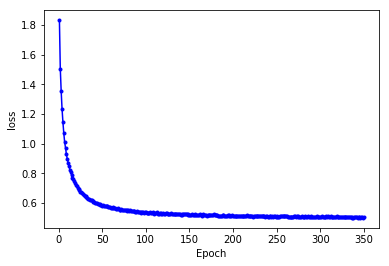

In [4]:
#lr = [0.01, 0.005, 0.001, 0.0005] #lr=[0.01, 0.005, 0.001, 0.001] could be better
lr=[0.01, 0.005, 0.001, 0.001]
epoch = [200, 250, 300] # first20

run_num = 15 #2
net_name = 'Orig_Stride_CNN_C'

torch.cuda.set_device(1)

orig_stride_cnn_c = help_func.running_model(run_num, orig_stride_cnn_c, net_name, lr, epoch, 
                        loader_train, loader_val, loader_test)